<a href="https://www.kaggle.com/code/dplayer/canada-rental-prices-visualization?scriptVersionId=120033954" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/rent-data-statcan-1987-2020/Canada_2_Bed_rent.csv
/kaggle/input/rent-data-statcan-1987-2020/Canada_3_Bed_rent.csv
/kaggle/input/rent-data-statcan-1987-2020/Canada_1Bed_rent.csv
/kaggle/input/rent-data-statcan-1987-2020/Canada_bachelor_rent.csv


## Purpose
### The notebook will explore different chart options. I use the Canada rent prices dataset from StatCanada to play with different visualization libraries. This notebook is for learning purposes to try out pandas transformation capabilities and massage the data for visualization purposes.

In [2]:
from pathlib import Path

In [3]:
## Load the rent prices data
df_2_bed = pd.read_csv(Path('/kaggle/input/rent-data-statcan-1987-2020/Canada_2_Bed_rent.csv'), na_values='F')
df_3_bed = pd.read_csv(Path('/kaggle/input/rent-data-statcan-1987-2020/Canada_3_Bed_rent.csv'), na_values='F')
df_1_bed = pd.read_csv(Path('/kaggle/input/rent-data-statcan-1987-2020/Canada_1Bed_rent.csv'), na_values='F')
df_bachelor = pd.read_csv(Path('/kaggle/input/rent-data-statcan-1987-2020/Canada_bachelor_rent.csv'), na_values='F')

In [4]:
df_2_bed.head()

,City,Province,1987,1988,1989,1990,1991,1992,1993,1994,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,St. John's,Newfoundland and Labrador,538,516,535,544,570,575,562,566,...,779.0,803.0,871.0,897.0,935.0,986.0,963.0,991.0,980.0,997.0
1,Charlottetown,Prince Edward Island,448,457,472,492,514,519,528,529,...,764.0,808.0,808.0,840.0,832.0,876.0,901.0,922.0,936.0,983.0
2,Cape Breton,Nova Scotia,401,401,424,427,465,474,474,487,...,736.0,757.0,760.0,790.0,781.0,774.0,795.0,815.0,847.0,826.0
3,Halifax,Nova Scotia,527,537,551,576,604,602,611,616,...,932.0,960.0,984.0,1013.0,1056.0,1072.0,1115.0,1162.0,1209.0,1264.0
4,Campbellton,New Brunswick part,NaN,NaN,NaN,413,432,434,443,442,...,573.0,582.0,583.0,594.0,598.0,608.0,614.0,631.0,639.0,633.0


## Data Transformation
Instead of having the years as columns in the data shown above I want to have it as part of the data under a single column called as Year, and add a corresponding column showing the rent for the year.

In [5]:
def collapseYearIntoColumn(df, st_year, en_year, col_name):
    col_range = list(range(df.columns.get_loc(st_year),df.columns.get_loc(en_year)+1))
    sz = len(col_range)
    col_range.extend([0,1])
    df2 = df.iloc[: , col_range].copy()
    df3 = pd.melt(df2, id_vars=['City', 'Province'], value_vars=df2.columns[0:sz], var_name='Year', value_name=col_name)
    return df3

In [6]:
updated_df_2_bed = collapseYearIntoColumn(df_2_bed, '1987', '2020', 'Two_Bed')
updated_df_3_bed = collapseYearIntoColumn(df_3_bed, '1987', '2020', 'Three_Bed')
updated_df_1_bed = collapseYearIntoColumn(df_1_bed, '1987', '2020', 'One_Bed')
updated_df_bachelor = collapseYearIntoColumn(df_bachelor, '1987', '2020', 'Bachelor')

### After Transformation the data will look like shown below

In [7]:
updated_df_3_bed.head()

,City,Province,Year,Three_Bed
0,St. John's,Newfoundland and Labrador,1987,518
1,Charlottetown,Prince Edward Island,1987,517
2,Cape Breton,Nova Scotia,1987,519
3,Halifax,Nova Scotia,1987,643
4,Campbellton,New Brunswick part,1987,NaN


### Remove symbols that are not numeric to NAN. The dataset has many ".."

In [8]:
def convertSymbolstoNans(df, column_name, symbol):
    cities = df.query(f'{column_name}=="{symbol}"').City.unique()
    for city in cities:
        df.replace(symbol, np.NaN, inplace=True)
    return df

In [9]:
updated_df_2_bed = convertSymbolstoNans(updated_df_2_bed, 'Two_Bed', "..")
updated_df_3_bed = convertSymbolstoNans(updated_df_3_bed, 'Three_Bed', "..")
updated_df_1_bed = convertSymbolstoNans(updated_df_1_bed, 'One_Bed', "..")
updated_df_bachelor = convertSymbolstoNans(updated_df_bachelor, 'Bachelor', "..")

In [10]:

updated_df_2_bed.Two_Bed = updated_df_2_bed.Two_Bed.astype('float32')
updated_df_3_bed.Three_Bed = updated_df_3_bed.Three_Bed.astype('float32')
updated_df_1_bed.One_Bed = updated_df_1_bed.One_Bed.astype('float32')
updated_df_bachelor.Bachelor = updated_df_bachelor.Bachelor.astype('float32')
updated_df_2_bed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2074 entries, 0 to 2073
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   City      2074 non-null   object 
 1   Province  2074 non-null   object 
 2   Year      2074 non-null   object 
 3   Two_Bed   1994 non-null   float32
dtypes: float32(1), object(3)
memory usage: 56.8+ KB


### The next step will be to impute. It will be done in two steps. 

1. For cities that have NaNs at the start, we will set rent for those years to 0.
2. For cities that NaN  in the middle, we just replace it with the value above it. This is a good assumption to make here since we know rent wont be lower that than previous year. 

In [11]:
def findAndSetBeforeValidRentYear(value_to_set, df, column_name):
    fid = df[column_name].first_valid_index()
    if fid is None:
        idx = df.index
    else:
        en = df.index.get_loc(fid)
        idx = df.index[:en]
    df.loc[idx, column_name] = value_to_set
    return df

In [12]:
def imputeRents(df, column_name):
    cities = df.City.loc[df[column_name].isna()].unique()
    for city in cities:
        city_df = df.query(f'City=="{city}"').copy()
        city_df = findAndSetBeforeValidRentYear(0, city_df, column_name)
        city_df = city_df.fillna(method='ffill')
        df.loc[city_df.index, column_name] = city_df[column_name]
    return df
        

In [13]:
updated_df_2_bed = imputeRents(updated_df_2_bed, "Two_Bed")
updated_df_3_bed = imputeRents(updated_df_3_bed, "Three_Bed")
updated_df_1_bed = imputeRents(updated_df_1_bed, "One_Bed")
updated_df_bachelor = imputeRents(updated_df_bachelor, "Bachelor")

In [14]:
combined_df = updated_df_1_bed.copy()
combined_df['Two_Bed'] = updated_df_2_bed.iloc[:,3]
combined_df['Three_Bed'] = updated_df_3_bed.iloc[:,3]
combined_df['Bachelor'] = updated_df_bachelor.iloc[:,3]

In [15]:
combined_df.isna().sum()


City         0
Province     0
Year         0
One_Bed      0
Two_Bed      0
Three_Bed    0
Bachelor     0
dtype: int64

In [16]:
combined_df.head()

,City,Province,Year,One_Bed,Two_Bed,Three_Bed,Bachelor
0,St. John's,Newfoundland and Labrador,1987,458.0,538.0,518.0,364.0
1,Charlottetown,Prince Edward Island,1987,367.0,448.0,517.0,309.0
2,Cape Breton,Nova Scotia,1987,308.0,401.0,519.0,242.0
3,Halifax,Nova Scotia,1987,438.0,527.0,643.0,376.0
4,Campbellton,New Brunswick part,1987,0.0,0.0,0.0,0.0


In [17]:
combined_df.Year = combined_df.Year.astype('int32')
#combined_df.Year = pd.to_datetime(combined_df.Year, format='%Y')
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2074 entries, 0 to 2073
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   City       2074 non-null   object 
 1   Province   2074 non-null   object 
 2   Year       2074 non-null   int32  
 3   One_Bed    2074 non-null   float32
 4   Two_Bed    2074 non-null   float32
 5   Three_Bed  2074 non-null   float32
 6   Bachelor   2074 non-null   float32
dtypes: float32(4), int32(1), object(2)
memory usage: 73.0+ KB


In [18]:
combined_df.head()

,City,Province,Year,One_Bed,Two_Bed,Three_Bed,Bachelor
0,St. John's,Newfoundland and Labrador,1987,458.0,538.0,518.0,364.0
1,Charlottetown,Prince Edward Island,1987,367.0,448.0,517.0,309.0
2,Cape Breton,Nova Scotia,1987,308.0,401.0,519.0,242.0
3,Halifax,Nova Scotia,1987,438.0,527.0,643.0,376.0
4,Campbellton,New Brunswick part,1987,0.0,0.0,0.0,0.0


## Visualization

Now that we have combined all the rent prices for different apartments, for each city we can visualize the data

### Given a city how has the rent prices trended for each apartment type

In [19]:
import plotly.express as px
import matplotlib.pyplot as plt
import altair as alt

In [20]:
pd.set_option("display.max_columns", 100)

In [21]:
def plotLineInPandas(df, city):
    city_df = df.query(f'City=="{city}"')
    axes = city_df.plot(x='Year', 
                        linestyle='-', 
                        figsize=(18,5), 
                        markevery=1, marker='o', markerfacecolor='black', 
                        xlim = (city_df.Year.min(), city_df.Year.max()),
                        title = f'City of {city}')
    axes.set_ylim(ymin=0)
    axes.set_xticks(city_df['Year'])
    axes.set_xlabel('Rent Prices By Year')
    axes.set_ylabel('Average Rent Prices')

In [22]:
def plotLineinPlotly(df, city):
    px_df = combined_df.query(f'City=="{city}"')
    px_df = px_df.set_index('Year')
    px_df = px_df[px_df.columns[2:7]]
    fig = px.line(px_df, markers=True, title=f"City of {city}", 
                  labels=dict(value="Average Rent Prices", Year="Rent Prices By Year", variable="Unit Type"))
    fig.show()

In [23]:
def plotLineinAltair(df, city):
    alt_df = combined_df.query(f'City=="{city}"')
    alt_df = alt_df.melt(id_vars=['City', 'Province', 'Year'], 
                         value_vars=['One_Bed', 'Two_Bed', 'Three_Bed', 'Bachelor'], 
                         var_name='Units', 
                         value_name='Prices')
    # Create a selection that chooses the nearest point & selects based on x-value
    nearest = alt.selection(type='single', nearest=True, on='mouseover',
                            fields=['Year'], empty='none')

    # The basic line
    line = alt.Chart(alt_df).mark_line(point=True).encode(
        x=alt.X('Year:O', axis=alt.Axis(title="Rent Prices By Year")),
        y=alt.Y('Prices:Q', axis=alt.Axis(title="Average Rent Prices")),
        color='Units:N',
        tooltip=['Year', 'Units', 'Prices']
    )
    # Transparent selectors across the chart. This is what tells us
    # the x-value of the cursor
    selectors = alt.Chart(alt_df).mark_point().encode(
        x='Year:O',
        opacity=alt.value(0),
    ).add_selection(
        nearest
    )
    # Draw points on the line, and highlight based on selection
    points = line.mark_point().encode(
       opacity=alt.condition(nearest, alt.value(1), alt.value(0))
    )
    # Draw text labels near the points, and highlight based on selection
    text = line.mark_text(align='left', dx=5, dy=-5).encode(
        text=alt.condition(nearest, 'Prices:Q', alt.value(' ')),
        tooltip=['Year', 'Units', 'Prices']
    )
    # Put the five layers into a chart and bind the data
    return alt.layer(
        line,
        selectors,
        text,
        points
    ).properties(
        width=800, 
        height=300,
        title=f'City of {city}'
    )

For the city of St. John's, the rent prices have trended higher, and the rent prices for each type of unit has grown at the same rate.

Plot line from Pandas (Matplotlib)

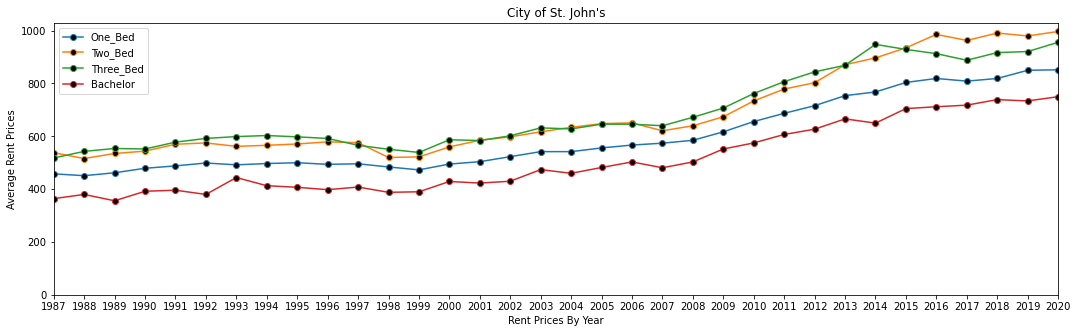

In [24]:
plotLineInPandas(combined_df, "St. John\'s")

Plot line from Plotly, so as to make it interactive

In [25]:
plotLineinPlotly(combined_df, "St. John\'s")

Plot line from Altair, so as to make it interactive

In [26]:
plotLineinAltair(combined_df, "St. John\'s")

alt.LayerChart(...)

However, for the city of Campbellton, around 2014 or so, rent for three bedroom apartments have increased at a higher rate when compared to other type of units. Note that there is also an anomaly in the data for bachelor unit between 2000 and 2001. This can be confirmed from the original data and shown below. It seems like post 2001, data is more consistent for bachelor units.

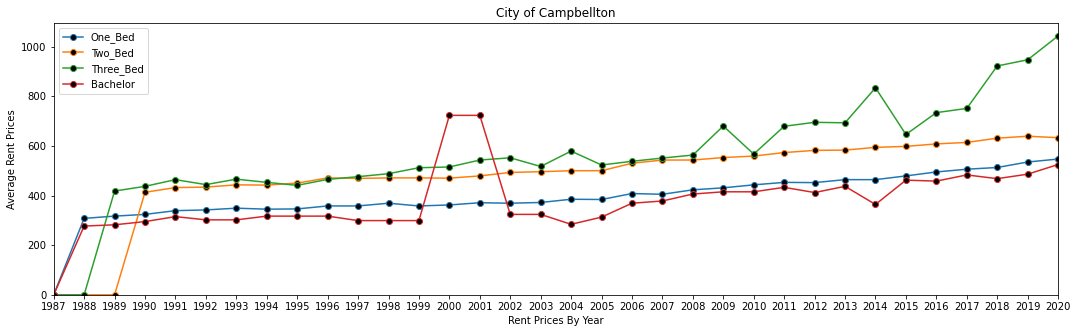

In [27]:
plotLineInPandas(combined_df, "Campbellton")

In [28]:
plotLineinPlotly(combined_df, "Campbellton")

In [29]:
plotLineinAltair(combined_df, "Campbellton")

alt.LayerChart(...)

In [30]:
df_bachelor.query('City=="Campbellton"')

,City,Province,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
4,Campbellton,New Brunswick part,NaN,277,282,295,315,302,NaN,317,NaN,NaN,299,NaN,NaN,723,NaN,324,324,284,313,369,378,406.0,415.0,415.0,433.0,412.0,437.0,364.0,462.0,458.0,483.0,468.0,486.0,525.0
